# Installing missing Libraries:

In [1]:
!pip install missingno
!pip install scikit-learn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


# Importing Libraries:

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

# Importing Dataset

In [3]:

#df = pixiedust.sampleData('https://raw.githubusercontent.com/adityaavhad/water_potability/main/water_potability%20(1).csv')
df = pd.read_csv('https://raw.githubusercontent.com/adityaavhad/water_potability/main/water_potability%20(1).csv')

df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#Removing Missing Rows
df1 =df.dropna()
print(df.shape)
print(df1.shape)

(3276, 10)
(2011, 10)


In [5]:
#Summarizing the data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Visualization 

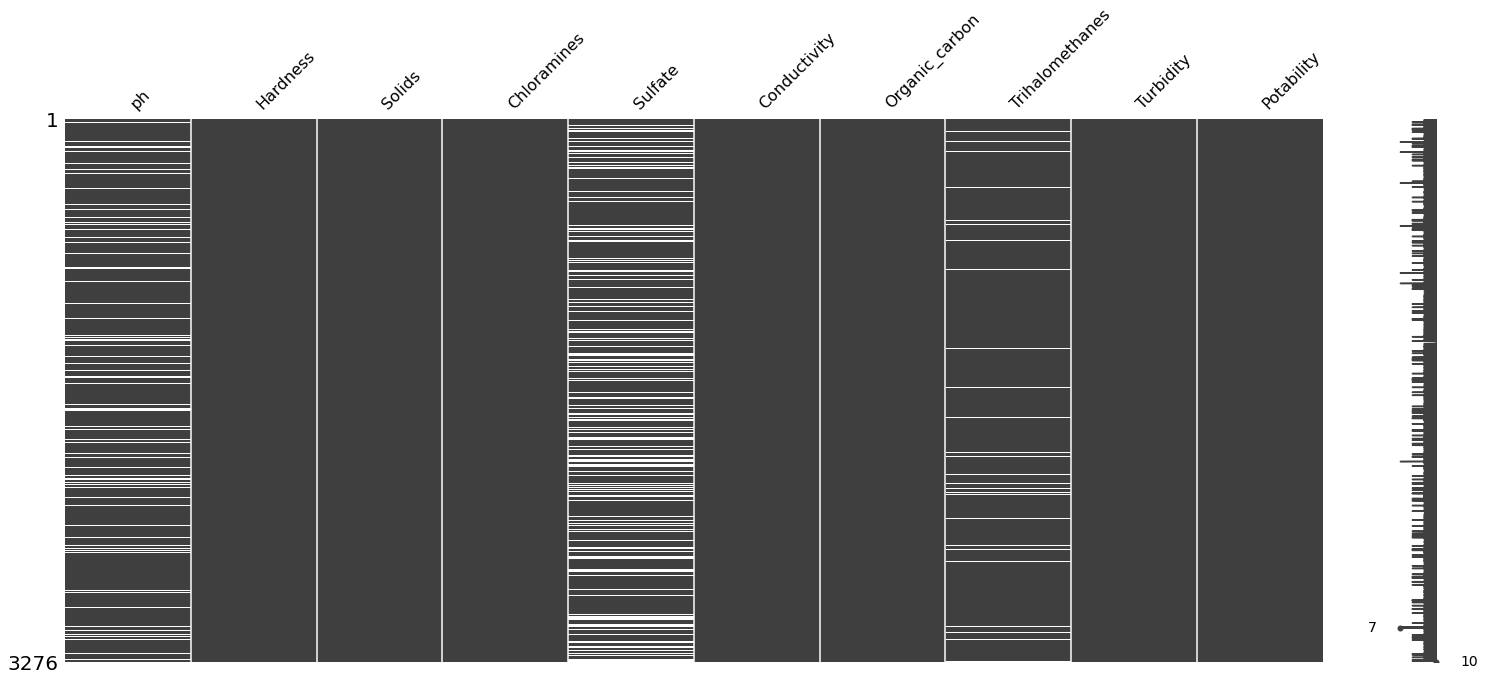

In [6]:
#Visual representation of the missing values in each column:
msno.matrix(df)

In [7]:
features_num = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                'Turbidity']

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


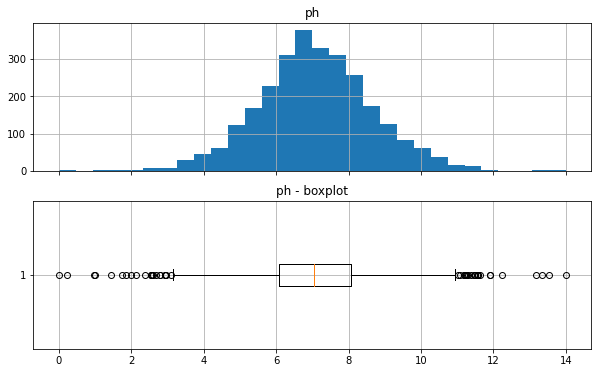

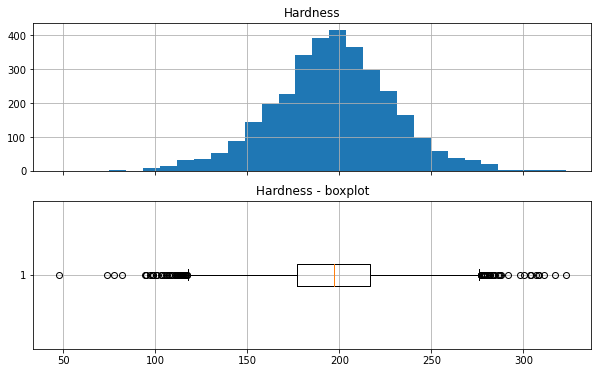

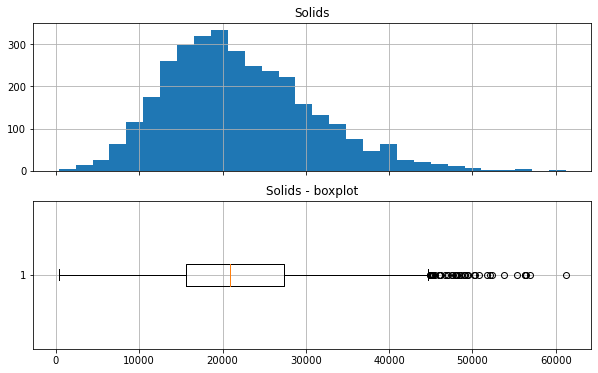

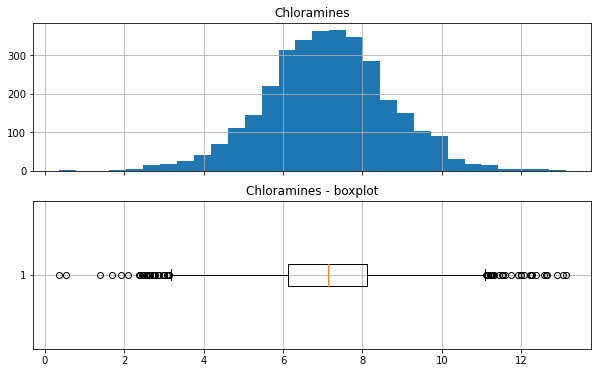

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


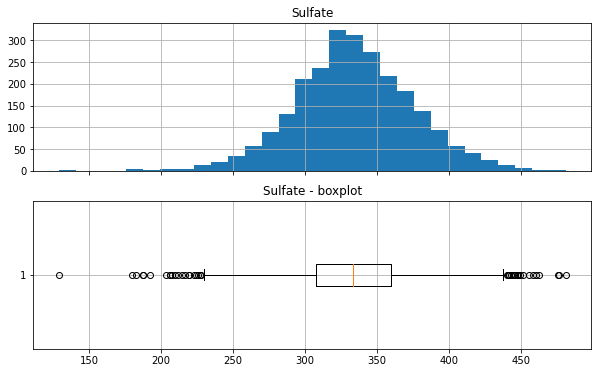

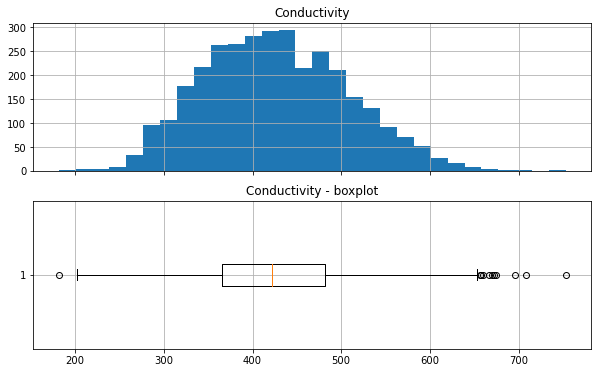

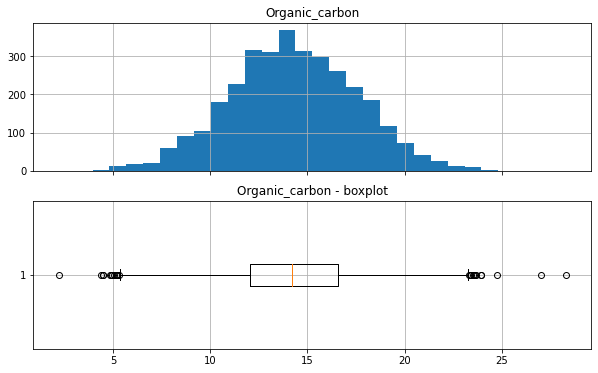

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


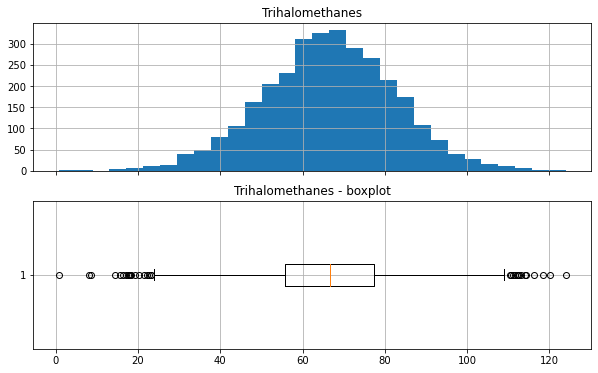

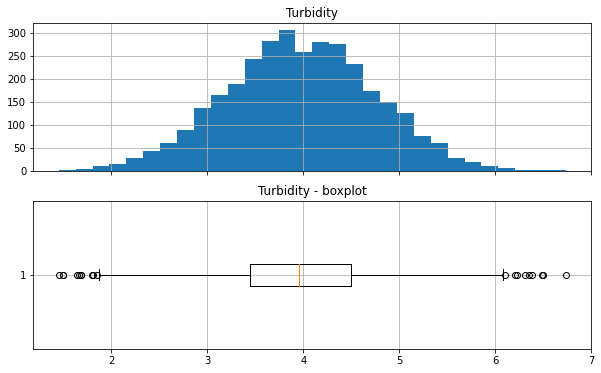

In [8]:
#Visualization of each independant column
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax1.hist(df[f], bins=30)
    ax1.grid()
    ax1.set_title(f)
    # for boxplot we need to remove the NaNs first
    feature_wo_nan = df[~np.isnan(df[f])][f]
    ax2.boxplot(feature_wo_nan, vert=False)
    ax2.grid()
    ax2.set_title(f + ' - boxplot')
    plt.show()

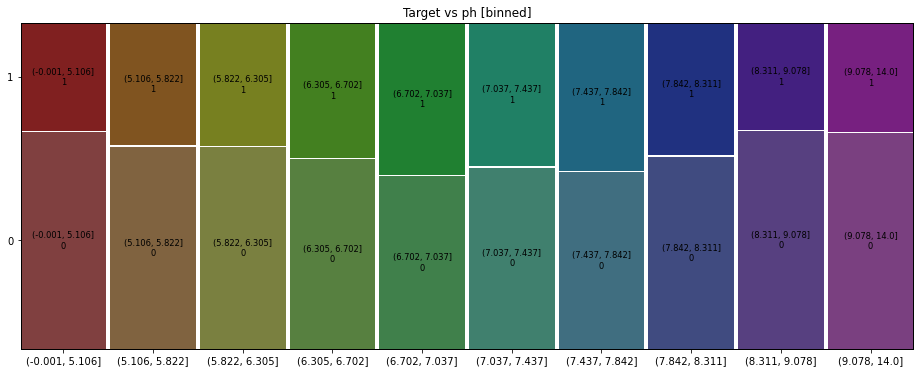

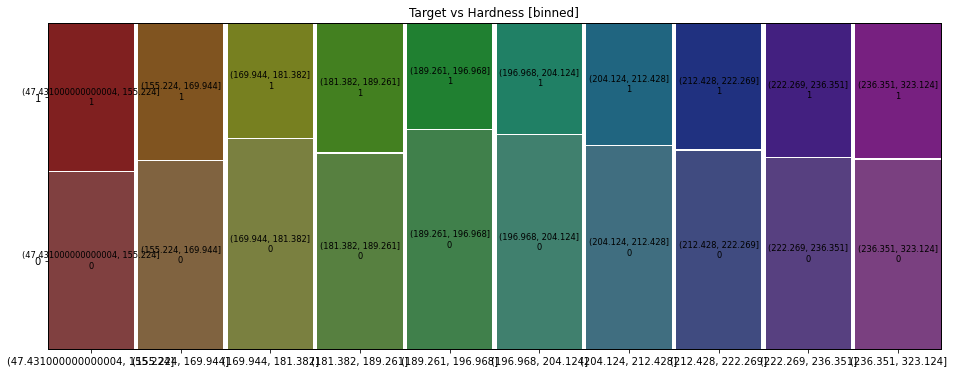

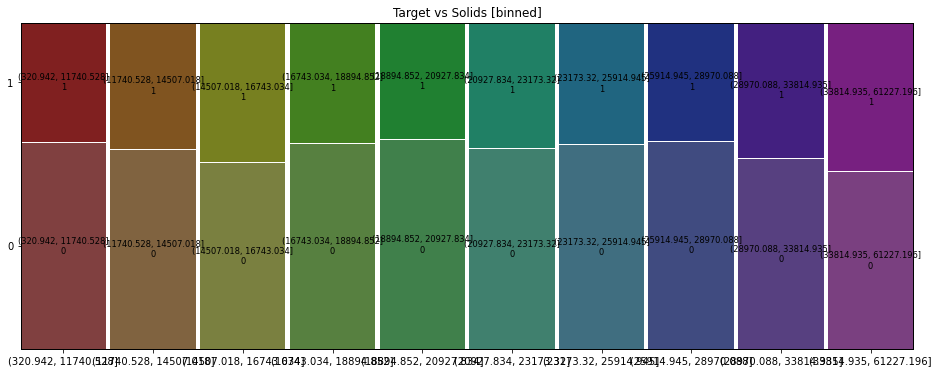

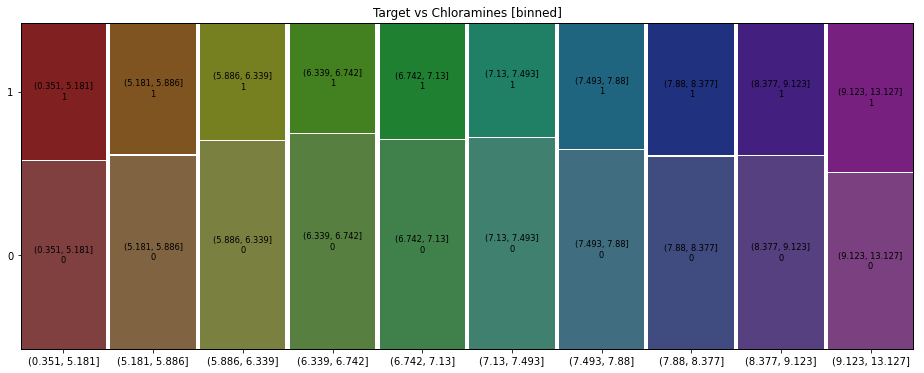

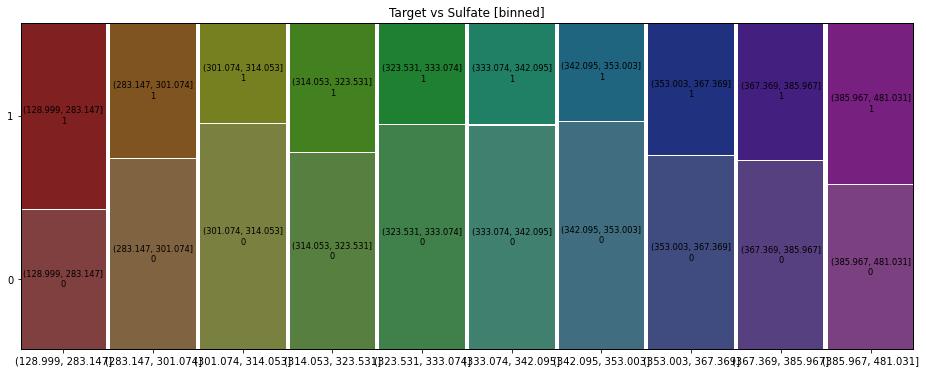

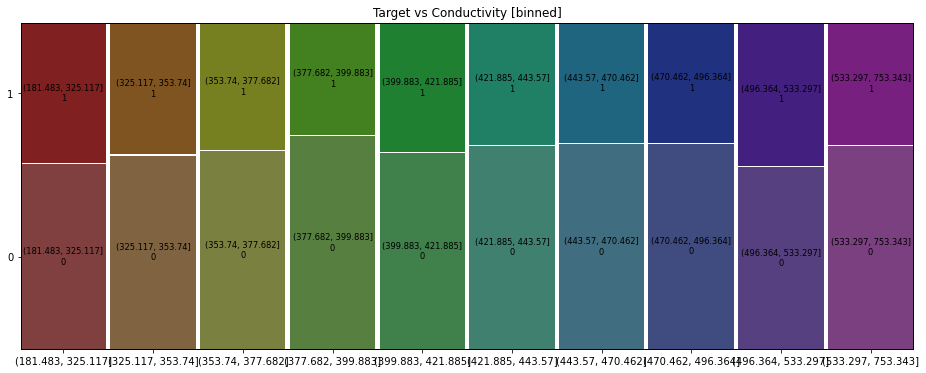

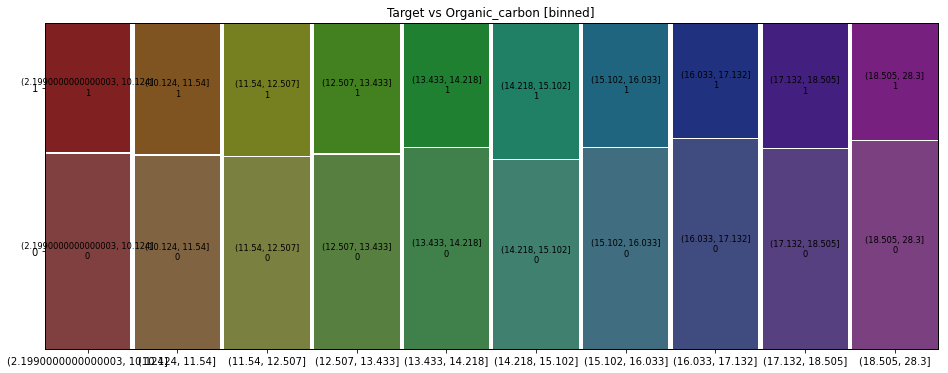

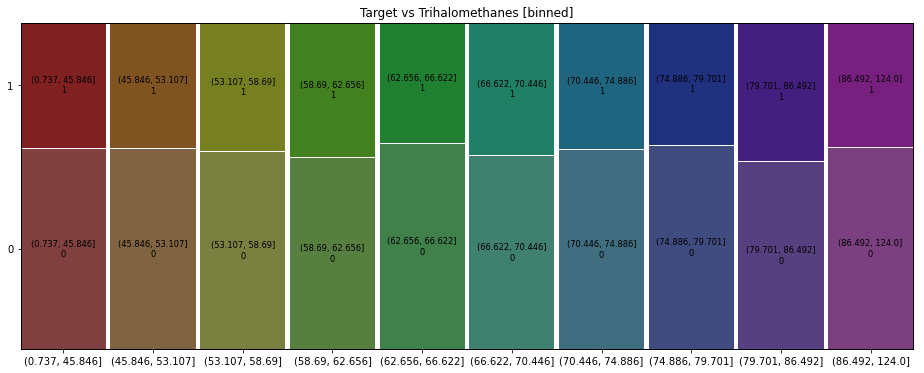

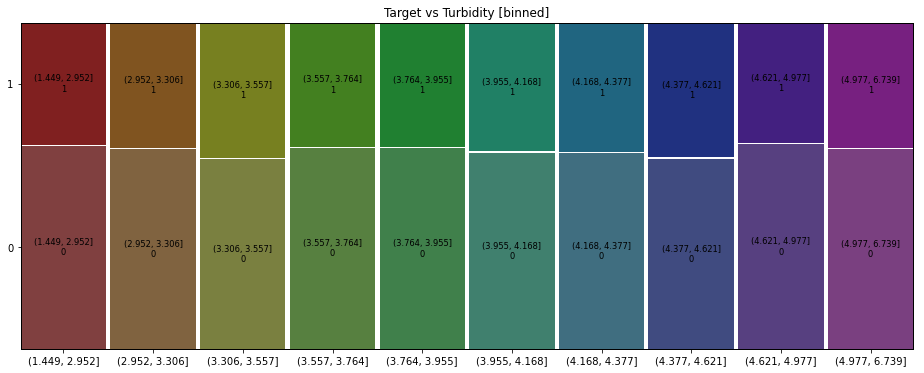

In [9]:
#Distribution of values wrt potability
plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

for f in features_num:
    # add binned version of each numerical feature first
    new_var = f + '_bin'
    df[new_var] = pd.qcut(df[f], 10)
    # then create mosaic plot
    plt.rcParams['figure.figsize'] = (16,6) # increase plot size for mosaics
    mosaic(df, [new_var, 'Potability'], title='Target vs ' + f + ' [binned]')
    plt.show()
    
# reset plot size again
plt.rcParams['figure.figsize'] = plt_para_save

# Model Building:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
X = df1[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
Y = df1[['Potability']]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 0)  #Train/Test split by 80:20 ratio

In [13]:
x_test.shape

(403, 9)

In [14]:
#Helper functions to show/store the scores of the models:
l=[]
class score:
    def __init__(self,model,mod):
        self.model = model
        self.mod= mod
    
    def score_save(self):
        y_pred=self.model.predict(x_test)
        l.append([self.mod,accuracy_score(y_test,y_pred)*100,f1_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),confusion_matrix(y_test,y_pred)])
            
    def show_score(self):
        print()
        df = pd.DataFrame(l,columns=['model','acc_score','f1-score','precision_score','recall_score','confusion_matrix'])
        return df
    
    def roc_curve(self):
        y_pred=self.model.predict(x_test)
        fpr,tpr,threshold=roc_curve(y_test,y_pred)
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b',
        label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


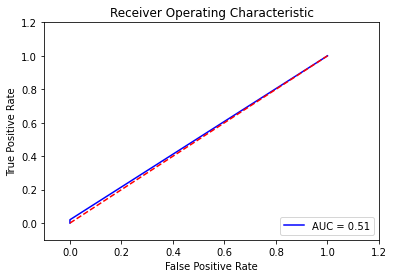

In [15]:
# Logistic regression
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)
a=score(lr,'Logistic regressor')
a.score_save()
a.roc_curve()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


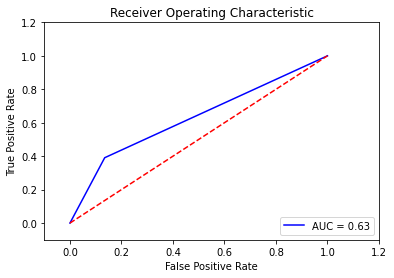

In [16]:
#Random Forest
rf = RandomForestClassifier(n_estimators=60)
rf.fit(x_train,y_train)
random=score(rf,'RandomForest')
random.score_save()
random.roc_curve()

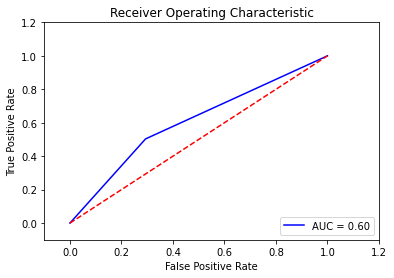

In [17]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
DT=score(dt,'Decision Tree')
DT.score_save()
DT.roc_curve()

Score: 0.6451612903225806


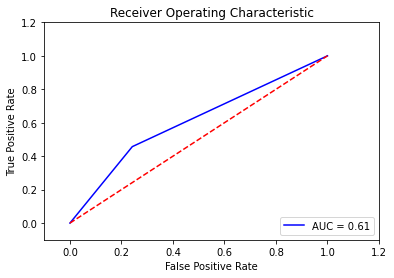

In [18]:
#Gradient Boosting:
GBmodel = GradientBoostingClassifier(n_estimators=328,learning_rate=1.0,max_depth=3,random_state=0).fit(x_train,y_train.values.ravel())
print('Score:',GBmodel.score(x_test,y_test))
GBmodel_out=score(GBmodel,'Gradient Boosting')
GBmodel_out.score_save()
GBmodel_out.roc_curve()

In [19]:
#XGBoost:
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train, y_train.values.ravel())
XGBmodel_out=score(XGBmodel,'XGB_simple')
XGBmodel_out.score_save()
XGBmodel_out.show_score()

,model,acc_score,f1-score,precision_score,recall_score,confusion_matrix
0,Logistic regressor,63.275434,0.038961,1.000000,0.019868,"[[252, 0], [148, 3]]"
1,RandomForest,68.734491,0.483607,0.634409,0.390728,"[[218, 34], [92, 59]]"
2,Decision Tree,63.027295,0.504983,0.506667,0.503311,"[[178, 74], [75, 76]]"
3,Gradient Boosting,64.516129,0.491103,0.530769,0.456954,"[[191, 61], [82, 69]]"
4,XGB_simple,67.245658,0.426087,0.620253,0.324503,"[[222, 30], [102, 49]]"
